In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [39]:
class NeuralNetwork:

    def __init__(self,inputs = 2,hidden_layers=[],output_neuron = 2,alpha=0.05):
        self.Neurons = [inputs]+ hidden_layers + [output_neuron]
        self.Layers = len(hidden_layers)+1
        self.alpha = alpha
        self.Weights = []
        self.Bias = []
        self.A = []
        self.Z = [np.zeros(inputs)]
        self.dW = []
        self.dB = []
        self.dZ = []
        self.Error = 0 
        self.Error_TS = []
        for layer in range(self.Layers):
            Weights = []
            Bias  = []
            A = []
            Z = []
            dW = []
            dB = []
            dZ = []
            Weights  = 0.7*np.random.randn(self.Neurons[layer+1],self.Neurons[layer])
            Bias = 0.7*np.random.randn(self.Neurons[layer+1])
            A = 0.7*np.random.randn(self.Neurons[layer+1])
            Z = 0.7*np.random.randn(self.Neurons[layer+1])
            self.Weights.append(Weights)
            self.Bias.append(Bias)
            self.A.append(A)
            self.Z.append(Z)
            self.dB.append(dB)
            self.dZ.append(dZ)
            self.dW.append(dW)

    def forward_pass(self,x):
        self.Z[0] = x
        for layer in range(self.Layers-1):
            self.Z[layer+1] = np.dot(self.Weights[layer],self.Z[layer])+self.Bias[layer]
            self.A[layer] = self.activation(self.Z[layer+1])
        layer = self.Layers-1
        self.Z[layer+1] = np.dot(self.Weights[layer],self.Z[layer])+self.Bias[layer]
        self.A[layer] = self.softmax(self.Z[layer+1])

    def softmax(self,z):
        e_x = np.exp(z - np.max(z))
        return e_x / e_x.sum()


    def activation(self,z):
        #Using reLU
        #return np.maximum(0,z)
        #sigmoid
        z_inter = 1/(1 + np.exp(-z))
        return z_inter
    
    def deriv_activation(self,z):
        sig = self.activation(z)
        return sig*(1-sig)
        #return z>0

    def back_prop(self,y,m=1):
        layer = self.Layers-1
        self.dZ[layer] = self.error(y)
        self.dW[layer] = 1 / m * self.dZ[layer].dot(self.A[layer])
        self.dB[layer] = 1 / m * np.sum(self.dZ[layer])
        layer = layer - 1 
        while(layer>=0):
            self.dZ[layer] = self.Weights[layer+1].T.dot(self.dZ[layer+1]) * self.deriv_activation(self.Z[layer+1])
            self.dW[layer] = 1 / m * self.dZ[layer].dot(self.A[layer].T)
            self.dB[layer] = 1 / m * np.sum(self.dZ[layer])
            layer = layer-1

    def error(self,y):
        Error =  self.A[self.Layers-1] - y
        self.Error = pow(sum(abs(Error)),2) + self.Error
        return Error

    def update_WB(self):
        for layer in range(self.Layers):
            self.Weights[layer] = self.Weights[layer] - self.alpha * self.dW[layer]
            self.Bias[layer] = self.Bias[layer] - self.alpha * self.dB[layer]

    def fit(self,X,Y,iterations):
        for i in range(iterations):
            for point in range(len(X)):
                x = np.array(X[point])
                self.forward_pass(x)
                self.back_prop(Y[point])
                self.update_WB()
        
            print("Error :",self.Error/X.size)
            self.Error_TS.append(self.Error/X.size)
            print("iterations: " ,i)
            self.Error = 0
    
    def plot(self):
        plt.plot(self.Error_TS)

In [4]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [59]:
nn = NeuralNetwork(inputs = 783,hidden_layers=[5,5],output_neuron=10,alpha=0.01)

In [6]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
Y_train,X_train = df_train.iloc[:, :1], df_test.iloc[:, 1:]


In [48]:
X = np.asarray(X_train)
Y = np.asarray(Y_train)

In [51]:
Y = one_hot(Y.T)

In [52]:
Y = Y.T

In [58]:
nn.Weights[1]

array([[-9261.33222384, -9262.60521163, -9261.19505955, -9261.93374475,
        -9262.02946121, -9262.14691773, -9262.072712  , -9262.32721962,
        -9262.31071366, -9261.37259356],
       [-9261.63217774, -9261.5316366 , -9262.13535447, -9260.91343591,
        -9261.73495956, -9262.17381459, -9262.29739803, -9262.37268724,
        -9263.2508625 , -9261.81899102],
       [-9261.47678097, -9262.77487923, -9262.48751549, -9262.99201765,
        -9262.72996941, -9261.8706319 , -9261.32677483, -9263.11512915,
        -9261.69582242, -9261.6069448 ],
       [-9261.41332646, -9261.54703089, -9262.43459727, -9262.16916351,
        -9262.32845253, -9261.71622582, -9262.33103421, -9262.53388602,
        -9261.26559359, -9263.37258844],
       [-9262.40057391, -9261.3508182 , -9262.57859334, -9261.41068257,
        -9261.25335351, -9260.22730424, -9262.40984007, -9261.88824385,
        -9262.86532909, -9261.55623185],
       [-9262.68311864, -9261.72695952, -9262.2075107 , -9262.62299733,
   

In [60]:
nn.fit(X,Y,iterations=100)

C:\Users\kashp\AppData\Local\Temp\ipykernel_8168\1460828290.py:54: RuntimeWarning: overflow encountered in exp
  z_inter = 1/(1 + np.exp(-z))


Error : 0.004629098550818575
iterations:  0
Error : 0.0046272915283775634
iterations:  1
Error : 0.0046258292548546345
iterations:  2
Error : 0.004625945973663511
iterations:  3
Error : 0.004625271760800236
iterations:  4
Error : 0.00462691843015129
iterations:  5


KeyboardInterrupt: 

In [46]:
nn.Z[2]

array([-18848455.10924018, -18850755.03138002, -18851833.33058111,
       -18855256.36051976, -18851800.87513721, -18855925.47126421,
       -18850387.60470331, -18852238.08111519, -18855441.21500538,
       -18853184.44793749])

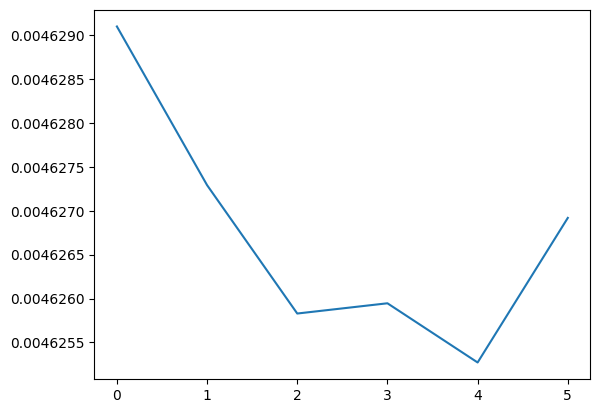

In [61]:
nn.plot()